# Flash-X simulation results for Benchmark Case #2 

In [1]:
import os
import itertools
from types import SimpleNamespace
import numpy
import matplotlib.pyplot as pyplot
from scipy.interpolate import make_interp_spline
from shapely import geometry
import LocalModule

In [2]:
DsetDirs, FileTags = LocalModule.case2_refinement_dict()
Results = dict()
for key in DsetDirs:
    Datasets = LocalModule.read_datasets(DsetDirs[key], FileTags[key])
    Results[key] = numpy.array([LocalModule.process_dataset(Dataset) for Dataset in Datasets])

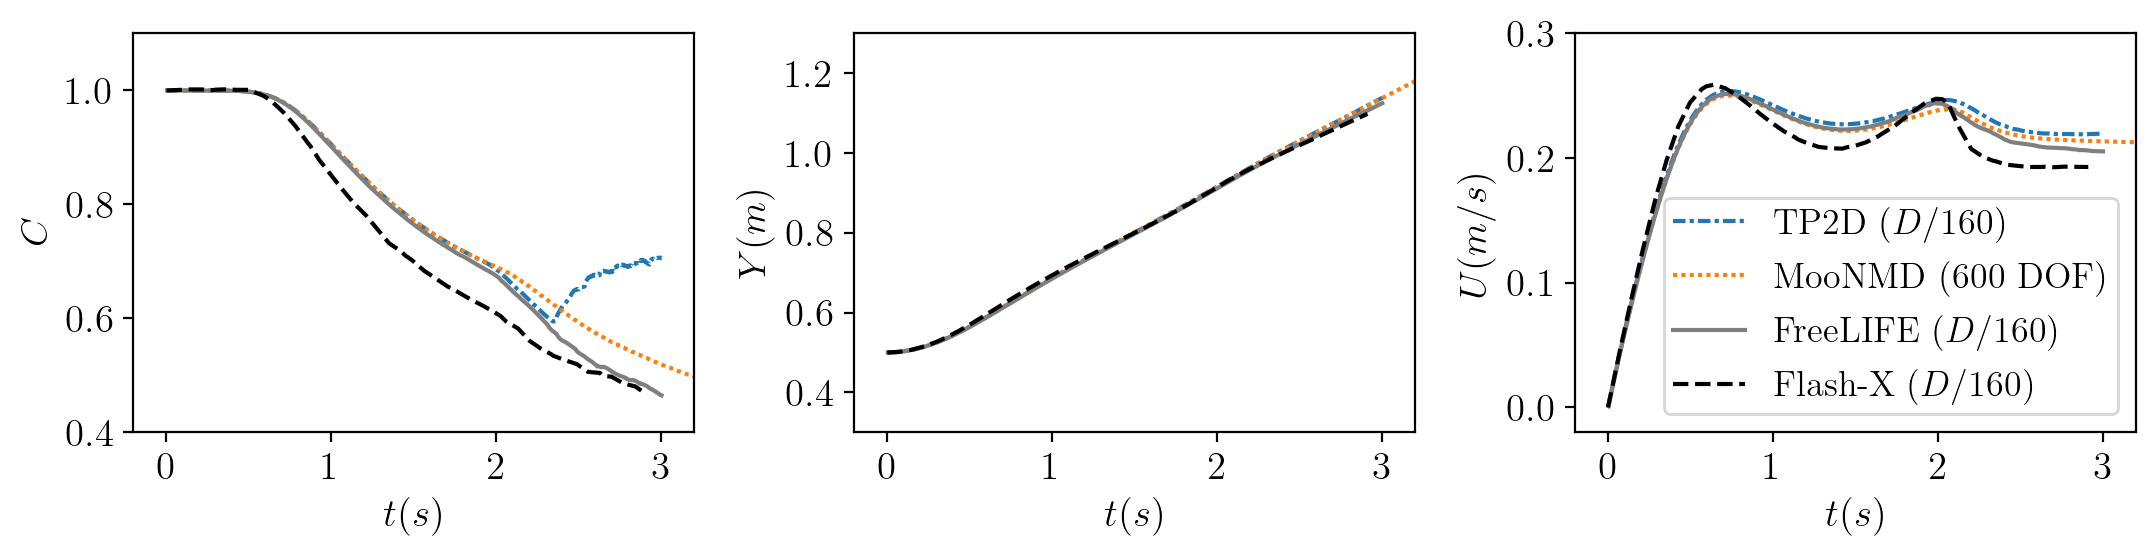

In [3]:
Reference1 = numpy.loadtxt("Benchmarks/Reference/data_bench_quantities/c2g1l7.txt")
Reference2 = numpy.loadtxt("Benchmarks/Reference/data_bench_quantities/c2g2l3.txt")
Reference3 = numpy.loadtxt("Benchmarks/Reference/data_bench_quantities/c2g3l3.txt")
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

QuantIndex = [2, 3, 4]
Figure, PlotList = pyplot.subplots(1, len(QuantIndex), figsize=(11,3), dpi=200)

for Plot, Index in zip(PlotList, QuantIndex):

    Linestyles = itertools.cycle(("--","-.", ":", "-"))
    Colors = itertools.cycle(("black","tab:red","tab:green","tab:blue"))
    Linewidths = itertools.cycle((1.5,1.5,1.5,1.5))

    Plot.plot(Reference1[:,0], Reference1[:,Index], linestyle=(0, (3, 1, 1, 1)), linewidth=1.5)
    Plot.plot(Reference3[:,0], Reference3[:,Index], linestyle=(0, (1, 1)), linewidth=1.5)
    Plot.plot(Reference2[:,0], Reference2[:,Index], linewidth=1.5, color='tab:gray')
              #marker='s', markevery=30, markersize=8, color='tab:gray')
    
    for key in ["Case2/h320"]:
        #spline = make_interp_spline(Results[key][:-10,0]*LocalModule.SIM_SCALE[0], 
        #                            Results[key][:-10,Index]*LocalModule.SIM_SCALE[Index])
        
        #time = numpy.linspace(0,3,100)
        
        Plot.plot(Results[key][:-10,0]*LocalModule.SIM_SCALE[0], 
                  Results[key][:-10,Index]*LocalModule.SIM_SCALE[Index], 
                  linewidth=next(Linewidths), linestyle=next(Linestyles), color=next(Colors))

    if Index == 2:
        Plot.set_ylim([0.4,1.1])
        Plot.set_ylabel(r"$C$", rotation=90)
    elif Index == 3:
        Plot.set_ylim([0.3,1.3])
        Plot.set_ylabel(r"$Y (m)$", rotation=90)
    elif Index == 4:
        Plot.set_ylim([-0.02,0.3])
        Plot.set_ylabel(r"$U (m/s)$", rotation=90)
        
    Plot.set_xlim([-0.2,3.2])
    Plot.set_xlabel(r"$t(s)$")

pyplot.legend(["TP2D ($D/160$)", "MooNMD ($600$ DOF)", "FreeLIFE ($D/160$)", f"Flash-X ($D/160$)"], borderpad=0.25, fontsize=13)
pyplot.tight_layout()
#pyplot.savefig("/Users/Akash/Desktop/fig_ref_compare.png")
pyplot.show()

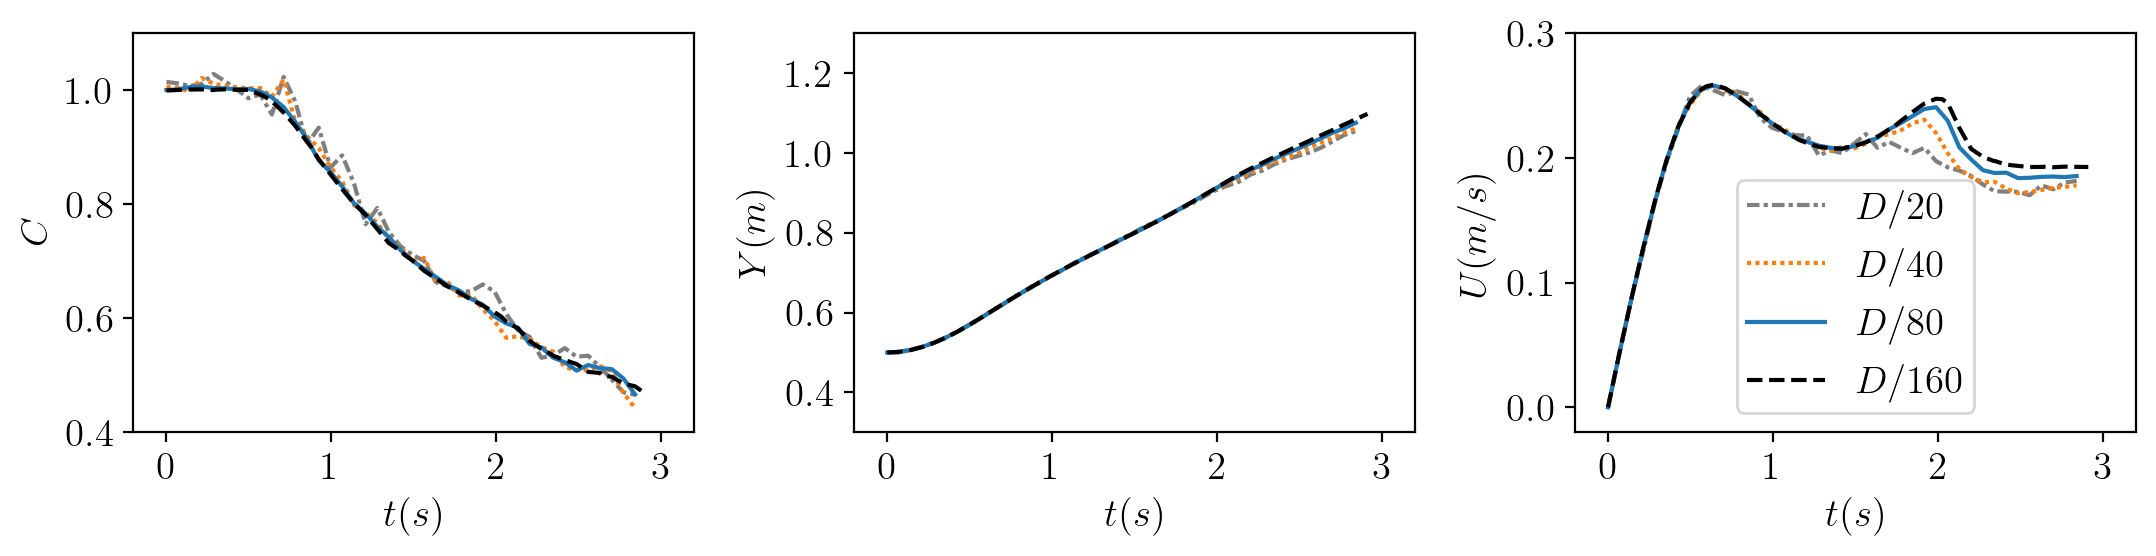

In [4]:
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

QuantIndex = [2, 3, 4]
Figure, PlotList = pyplot.subplots(1, len(QuantIndex), figsize=(11,3), dpi=200)

for Plot, Index in zip(PlotList, QuantIndex):

    Linestyles = itertools.cycle(((0, (3, 1, 1, 1)),(0, (1, 1)), "-", "--"))
    Colors = itertools.cycle(("tab:gray","tab:orange","tab:blue","black"))
    Linewidths = itertools.cycle((1.5,1.5,1.5,1.5))
    
    for key in Results:
        end = -10
        if key == "Case2/h320": end = -10
            
        Plot.plot(Results[key][:end,0]*LocalModule.SIM_SCALE[0], 
                  Results[key][:end,Index]*LocalModule.SIM_SCALE[Index], 
                  linewidth=next(Linewidths), linestyle=next(Linestyles), color=next(Colors))

    if Index == 2:
        Plot.set_ylim([0.4,1.1])
        Plot.set_ylabel(r"$C$", rotation=90)
    elif Index == 3:
        Plot.set_ylim([0.3,1.3])
        Plot.set_ylabel(r"$Y (m)$", rotation=90)
    elif Index == 4:
        Plot.set_ylim([-0.02,0.3])
        Plot.set_ylabel(r"$U (m/s)$", rotation=90)
        
    Plot.set_xlim([-0.2,3.2])
    Plot.set_xlabel(r"$t(s)$")

pyplot.legend([f"$D/20$",f"$D/40$",f"$D/80$",f"$D/160$"], borderpad=0.25)
pyplot.tight_layout()
#pyplot.savefig("/Users/Akash/Desktop/fig_grid_compare.png")
pyplot.show()

In [5]:
DsetDirs, FileTags = LocalModule.case2_refinement_contour_dict()
Datasets = {}
for key in DsetDirs:
    Datasets[key] = LocalModule.read_datasets(DsetDirs[key], FileTags[key])

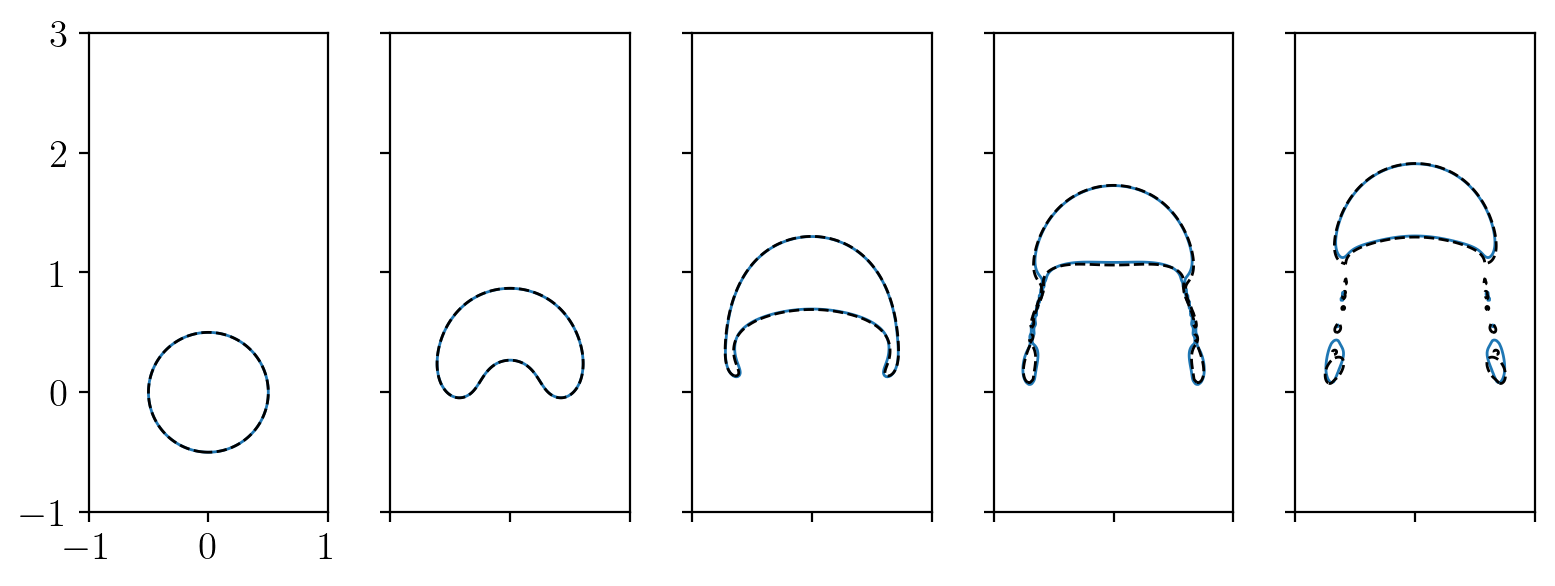

In [6]:
import boxkit
import boxkit.resources.flash as flash_box

pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

FileIndex = [*range(5)]
Figure, PlotList = pyplot.subplots(1, len(FileIndex), figsize=(8,3), dpi=200)

for Plot, Index in zip(PlotList,FileIndex):

    #Linestyles = itertools.cycle(("-.",":", "-", "--"))
    #Colors = itertools.cycle(("tab:gray","tab:orange","tab:blue","black"))
    #Linewidths = itertools.cycle((1,1,1,1))
    
    Linestyles = itertools.cycle(("-", "--"))
    Colors = itertools.cycle(("tab:blue","black"))
    Linewidths = itertools.cycle((1,1))

    for key in ["Case2/h160", "Case2/h320"]:
        Merged = boxkit.mergeblocks(Datasets[key][Index], ["dfun"])
        Merged.fill_guard_cells()
        flash_box.lset_plot_contour_2d(Plot, Merged, 
                                       linestyles=next(Linestyles), 
                                       linewidths=next(Linewidths), 
                                       colors=next(Colors)) 

    Plot.set_aspect('equal')
    Plot.set_xlim([-1,1])
    Plot.set_ylim([-1,3])
    if Index != 0:
        Plot.xaxis.set_tick_params(labelbottom=False)
        Plot.yaxis.set_tick_params(labelbottom=False)

#pyplot.axis('equal')
#pyplot.savefig("/Users/Akash/Desktop/fig_grid_bubble.png")
pyplot.tight_layout()
pyplot.show()

In [7]:
DsetDirs, FileTags = LocalModule.case2_outflow_dict()
Results = dict()
for key in DsetDirs:
    Datasets = LocalModule.read_datasets(DsetDirs[key], FileTags[key])
    Results[key] = numpy.array([LocalModule.process_dataset(Dataset) for Dataset in Datasets])

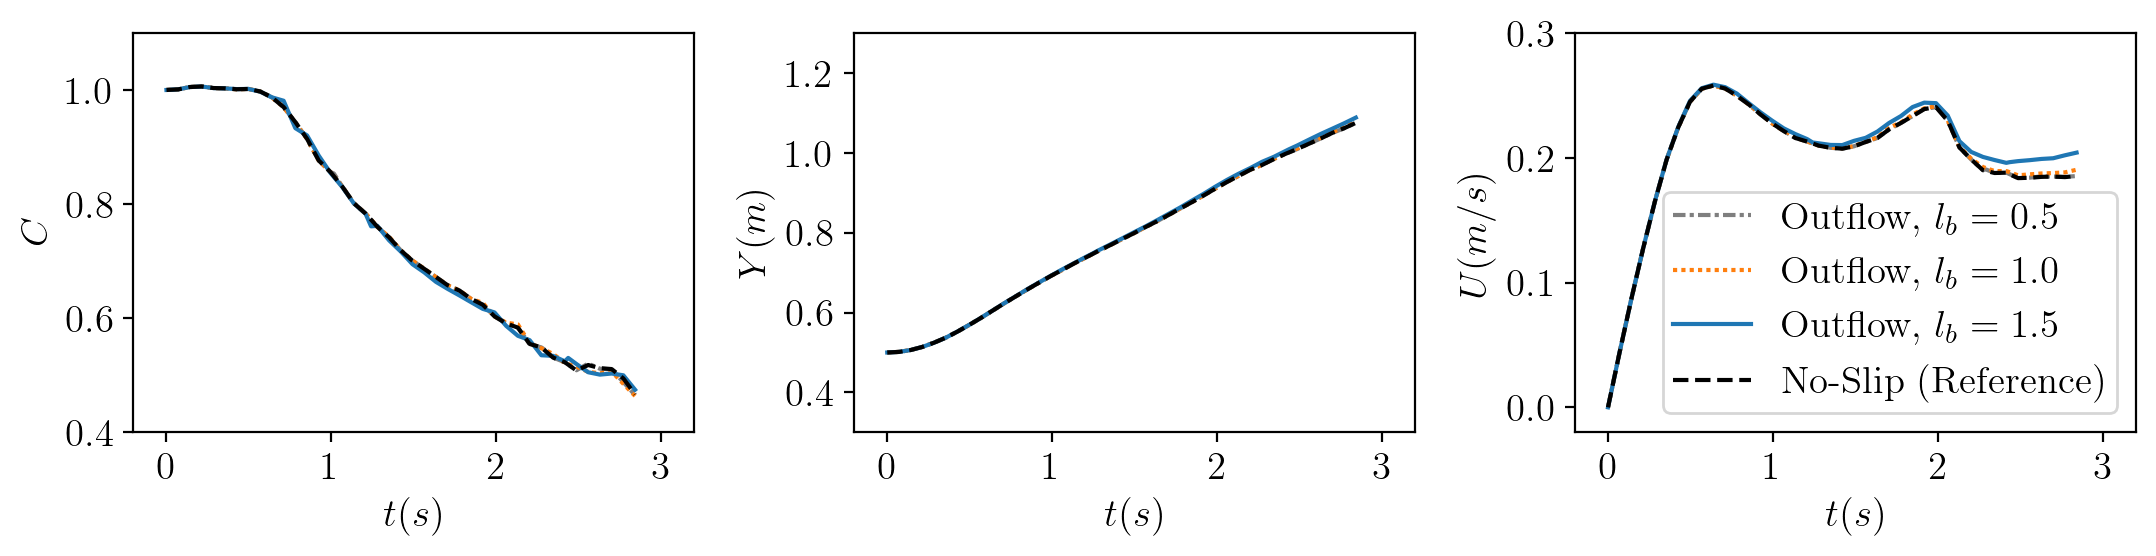

In [8]:
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

QuantIndex = [2, 3, 4]
Figure, PlotList = pyplot.subplots(1, len(QuantIndex), figsize=(11,3), dpi=200)

for Plot, Index in zip(PlotList, QuantIndex):

    Linestyles = itertools.cycle(((0, (3, 1, 1, 1)),(0, (1, 1)), "-", "--"))
    Colors = itertools.cycle(("tab:gray","tab:orange","tab:blue","black"))
    Linewidths = itertools.cycle((1.5,1.5,1.5,1.5))
    
    for key in Results:
        end = -10
            
        Plot.plot(Results[key][:end,0]*LocalModule.SIM_SCALE[0], 
                  Results[key][:end,Index]*LocalModule.SIM_SCALE[Index], 
                  linewidth=next(Linewidths), linestyle=next(Linestyles), color=next(Colors))

    if Index == 2:
        Plot.set_ylim([0.4,1.1])
        Plot.set_ylabel(r"$C$", rotation=90)
    elif Index == 3:
        Plot.set_ylim([0.3,1.3])
        Plot.set_ylabel(r"$Y (m)$", rotation=90)
    elif Index == 4:
        Plot.set_ylim([-0.02,0.3])
        Plot.set_ylabel(r"$U (m/s)$", rotation=90)
        
    Plot.set_xlim([-0.2,3.2])
    Plot.set_xlabel(r"$t(s)$")

pyplot.legend([f"Outflow, $l_b=0.5$",f"Outflow, $l_b=1.0$",f"Outflow, $l_b=1.5$",f"No-Slip (Reference)"], borderpad=0.25)
pyplot.tight_layout()
#pyplot.savefig("/Users/Akash/Desktop/fig_grid_compare.png")
pyplot.show()

In [9]:
DsetDirs, FileTags = LocalModule.case2_outflow_contour_dict()
Datasets = {}
for key in DsetDirs:
    Datasets[key] = LocalModule.read_datasets(DsetDirs[key], FileTags[key])

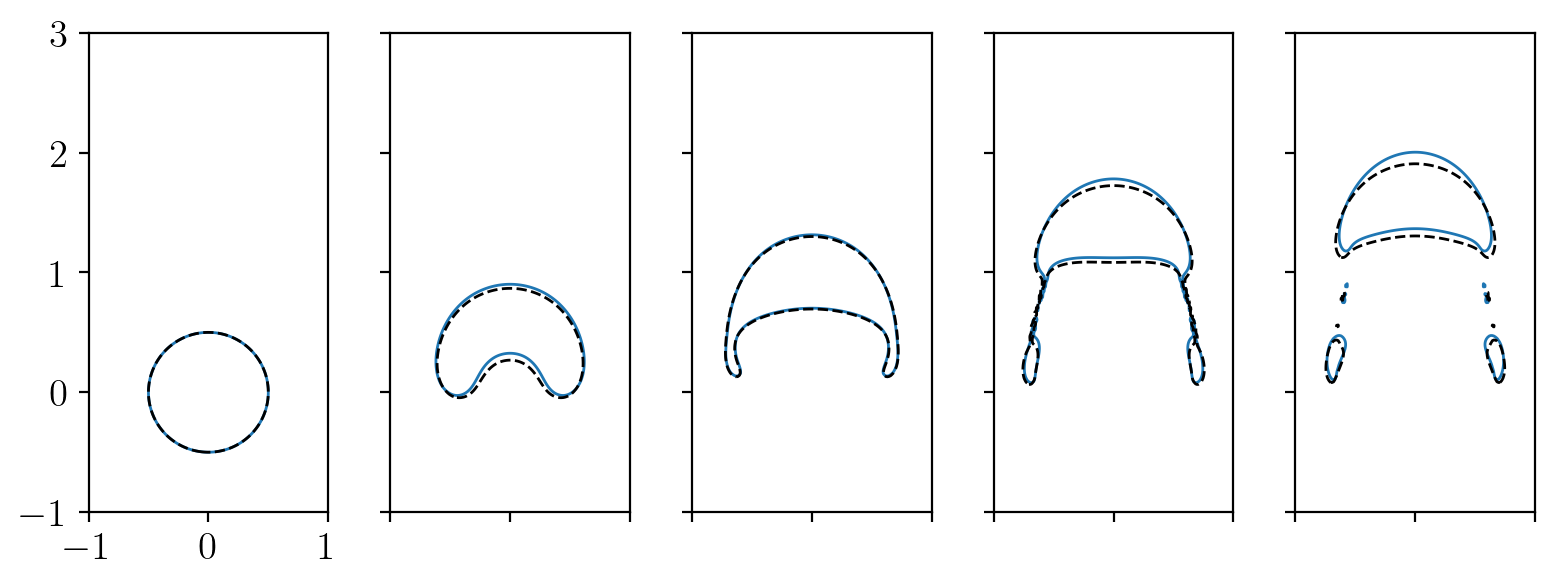

In [10]:
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

FileIndex = [*range(5)]
Figure, PlotList = pyplot.subplots(1, len(FileIndex), figsize=(8,3), dpi=200)

for Plot, Index in zip(PlotList,FileIndex):

    #Linestyles = itertools.cycle(("-.",":", "-", "--"))
    #Colors = itertools.cycle(("tab:gray","tab:orange","tab:blue","black"))
    #Linewidths = itertools.cycle((1,1,1,1))
    
    Linestyles = itertools.cycle(("-", "--"))
    Colors = itertools.cycle(("tab:blue","black"))
    Linewidths = itertools.cycle((1,1))

    for key in ["Case2/h160/lb1.5", "Case2/h160"]:
        Merged = boxkit.mergeblocks(Datasets[key][Index], ["dfun"])
        Merged.fill_guard_cells()
        flash_box.lset_plot_contour_2d(Plot, Merged, 
                                       linestyles=next(Linestyles), 
                                       linewidths=next(Linewidths), 
                                       colors=next(Colors)) 
    Plot.set_aspect('equal')
    Plot.set_xlim([-1,1])
    Plot.set_ylim([-1,3])
    if Index != 0:
        Plot.xaxis.set_tick_params(labelbottom=False)
        Plot.yaxis.set_tick_params(labelbottom=False)

#pyplot.axis('equal')
#pyplot.savefig("/Users/Akash/Desktop/fig_grid_bubble.png")
#pyplot.xlabel([-1, 1])
pyplot.tight_layout()
pyplot.show()

In [11]:
DsetDirs, FileTags = LocalModule.case2_grid_convergence_dict()
Datasets = {}
for key in DsetDirs:
    Datasets[key] = LocalModule.read_datasets(DsetDirs[key], FileTags[key])

Blocks = {}
for key in Datasets:
    Blocks[key] = boxkit.mergeblocks(Datasets[key][0], ["dfun", "velx", "vely"]).blocklist[0]

GridScale = {"Case2/h40" : 1, "Case2/h80" : 2, "Case2/h160" : 4, "Case2/h320" : 8}

In [12]:
block = Blocks["Case2/h40"]
MeshCoarseX, MeshCoarseY = numpy.meshgrid(block.xrange("center")[block.xguard:block.nxb+block.xguard], 
                                          block.yrange("center")[block.yguard:block.nyb+block.yguard])

for block, scale in zip(list(Blocks.values())[1:], list(GridScale.values())[1:]):
    xmesh, ymesh = numpy.meshgrid(block.xrange("center")[block.xguard:block.nxb+block.xguard], 
                                  block.yrange("center")[block.yguard:block.nyb+block.yguard])
    
    MeshFineX, MeshFineY = [0., 0.]
    
    for yoff in range(scale):
        for xoff in range(scale):
            MeshFineX = MeshFineX + xmesh[yoff::scale,xoff::scale]/(scale**2)
            MeshFineY = MeshFineY + ymesh[yoff::scale,xoff::scale]/(scale**2)
    
    if not (numpy.abs(MeshFineX-MeshCoarseX) < 1e-13).all():
        print(f"{scale} MeshX mismatch")
    if not (numpy.abs(MeshFineY-MeshCoarseY) < 1e-13).all():
        print(f"{scale} MeshY mismatch")

In [13]:
GridReference = {}

scale = GridScale["Case2/h320"]
block = Blocks["Case2/h320"]
offset = int(scale/2)

for var in ["dfun", "velx", "vely"]:
    
    WorkData = block[var][0,block.yguard:block.nyb+block.yguard,
                            block.xguard:block.nxb+block.xguard]
    GridReference[var] = 0.
    for yoff in range(scale):
        for xoff in range(scale):
            GridReference[var] = GridReference[var] + WorkData[yoff::scale,xoff::scale]/(scale**2)

In [14]:
for block, scale in zip(list(Blocks.values())[:-1], list(GridScale.values())[:-1]):
    
    GridData = {}
    
    for var in ["vely"]:
        WorkData = block[var][0,block.yguard:block.nyb+block.yguard,
                                block.xguard:block.nxb+block.xguard]
        
        if scale == 1:
            GridData[var] = WorkData
        else:
            
            GridData[var] = 0.       
            
            for yoff in range(scale):
                for xoff in range(scale):
                    GridData[var] = GridData[var] + WorkData[yoff::scale,xoff::scale]/(scale**2)
        
        error = numpy.sqrt((GridData[var]-GridReference[var])**2)
        print(f"{scale},{var}: {abs(error)}")

1,vely: [[5.25525387e-04 5.07283067e-04 4.71688091e-04 ... 4.71688091e-04
  5.07283067e-04 5.25525387e-04]
 [5.02154334e-04 4.83404872e-04 4.46906450e-04 ... 4.46906450e-04
  4.83404872e-04 5.02154334e-04]
 [3.83794895e-04 3.67851429e-04 3.36908096e-04 ... 3.36908096e-04
  3.67851429e-04 3.83794895e-04]
 ...
 [6.49528332e-06 6.35449845e-06 6.07455332e-06 ... 6.07455332e-06
  6.35449845e-06 6.49528332e-06]
 [1.34250333e-05 1.31069990e-05 1.24775507e-05 ... 1.24775507e-05
  1.31069990e-05 1.34250333e-05]
 [1.57179624e-05 1.53386649e-05 1.45886596e-05 ... 1.45886596e-05
  1.53386649e-05 1.57179624e-05]]
2,vely: [[1.33080688e-04 1.28596482e-04 1.19836006e-04 ... 1.19836006e-04
  1.28596482e-04 1.33080688e-04]
 [1.45209017e-04 1.40670568e-04 1.31773004e-04 ... 1.31773004e-04
  1.40670568e-04 1.45209017e-04]
 [1.42206558e-04 1.38578848e-04 1.31393738e-04 ... 1.31393738e-04
  1.38578848e-04 1.42206558e-04]
 ...
 [3.89813202e-06 3.79869106e-06 3.60258748e-06 ... 3.60258748e-06
  3.79869106e-06